# Image Compression using Numpy Singular Value Decomposition

I'm two modules into my Master's in Analytics at Georgia Tech now.

For my final assignment in CSE6040 Computing for Data Analysis course, we were tasked to answer a number of linear algebra questions aimed at helping us understand some concepts.

The theme was Singular Value Decomposition, which has famous applications in Principal Component Analysis and... 

Would you have guessed it? Image compression!

# Import packages

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mImage
import seaborn as sns
from PIL import Image

## Concept

Image compression is something we are all familiar as people who live in the era of social media. But how is it done?

First, let's look at an image. 

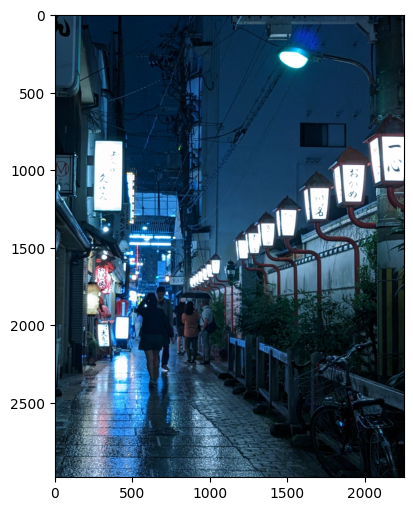

In [3]:
cwd = os.getcwd()
img = Image.open(os.path.join(cwd,'svd_demo.jpg'))
plt.figure(figsize=(9,6))
plt.imshow(img)

Matrices can be broken into 3 components by Singular Value Decomposition (SVD): 

$ M = U\Sigma V^T $

The main idea of 

Similar to principal component analysis (PCA), it is possible to find $N$ 

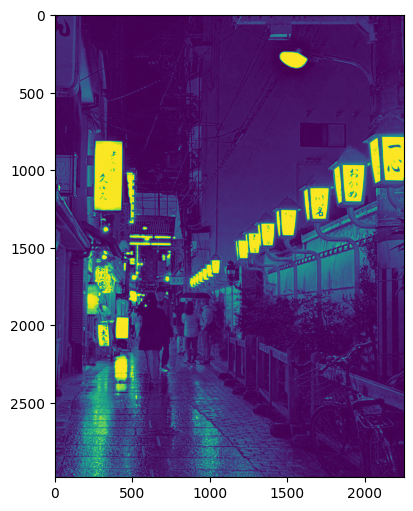

In [4]:
mat = np.array(list(img.getdata(band=0)), float).reshape(img.size[1], img.size[0])
plt.figure(figsize=(9,6))
plt.imshow(mat)

In [5]:
U, sigma, VT = np.linalg.svd(mat)

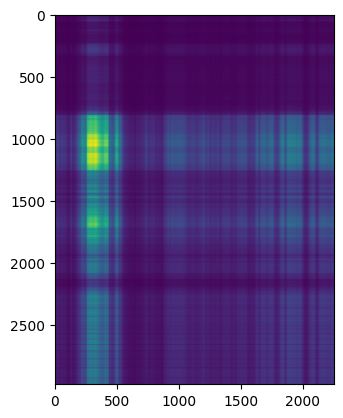

In [6]:
uncompress = np.matrix(U[:,:1]) @ np.diag(sigma[:1]) @ np.matrix(VT[:1,:])
plt.imshow(uncompress)

In [7]:
len(sigma)

2250

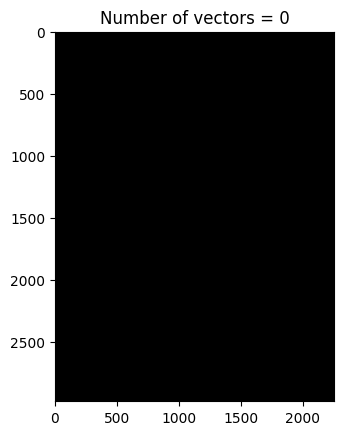

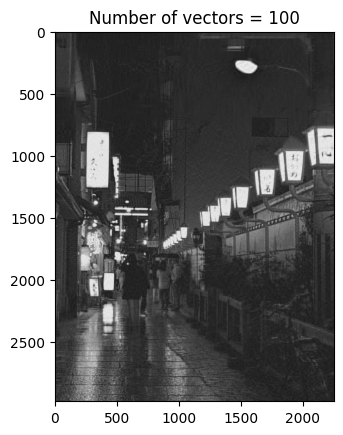

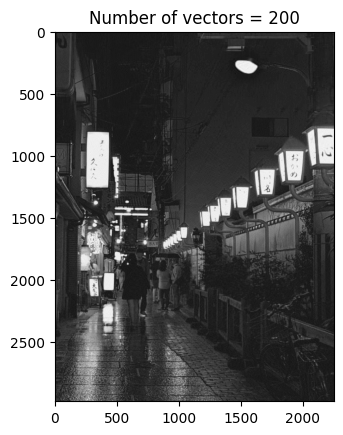

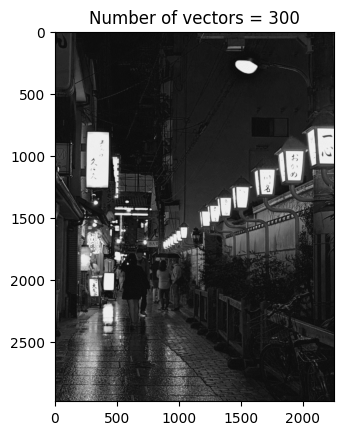

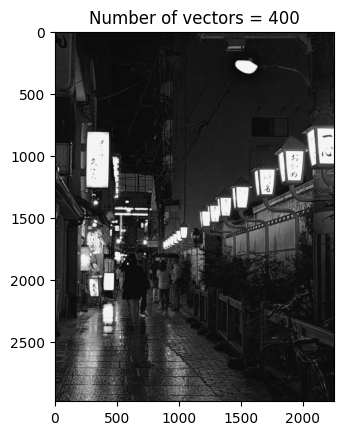

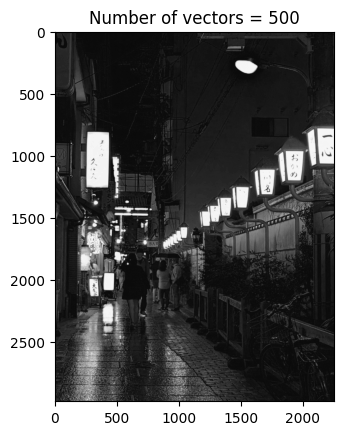

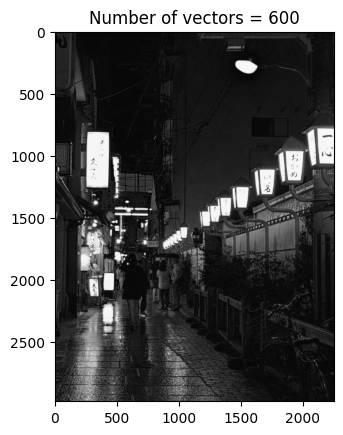

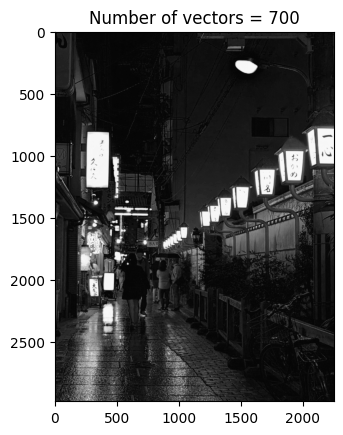

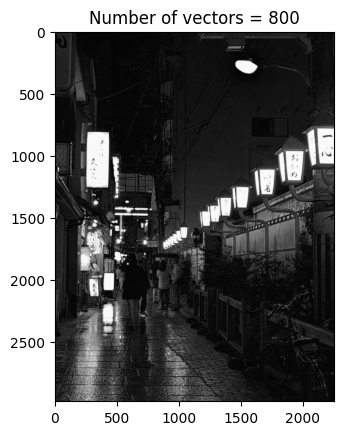

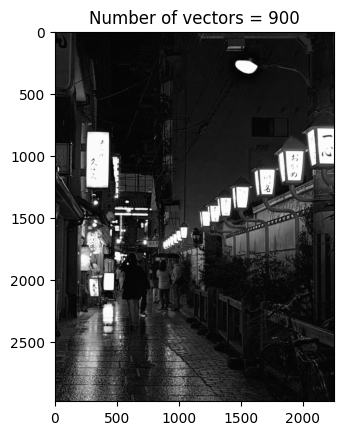

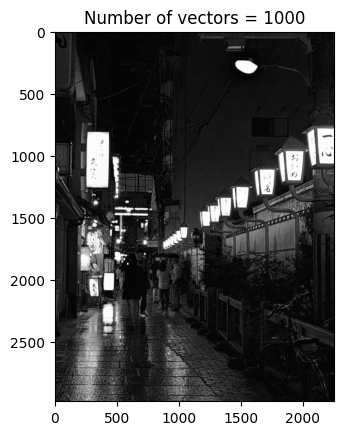

In [8]:
for k in range(0, 1100, 100):
    uncompress = np.matrix(U[:,:k]) @ np.diag(sigma[:k]) @ np.matrix(VT[:k,:])
    plt.imshow(uncompress, cmap='gray')
    title = f"Number of vectors = {k}"
    plt.title(title)
    plt.show()

In [9]:
original_size = np.product(mat.shape)

chosen_k = 300
compressed_size = chosen_k/len(sigma) * mat.shape[0] + chosen_k + chosen_k/len(sigma) * mat.shape[1]
compressed_size/original_size * 100

0.014874471787223464

In [10]:
def compress_image(U, S, VT, k):
    return (U[:,:k] @ np.diag(S[:k])) @ VT[:k]

In [39]:
A = mImage.imread('svd_demo.jpg')
A

array([[[29, 57, 78],
        [33, 61, 82],
        [36, 64, 85],
        ...,
        [14, 30, 45],
        [13, 29, 44],
        [13, 29, 44]],

       [[31, 59, 80],
        [34, 62, 83],
        [37, 65, 86],
        ...,
        [10, 26, 41],
        [10, 26, 41],
        [10, 26, 41]],

       [[31, 62, 83],
        [33, 64, 85],
        [38, 66, 88],
        ...,
        [ 5, 23, 37],
        [ 6, 22, 35],
        [ 6, 22, 35]],

       ...,

       [[22, 53, 73],
        [25, 56, 76],
        [21, 52, 72],
        ...,
        [ 2,  4,  3],
        [ 0,  2,  1],
        [ 0,  2,  1]],

       [[26, 57, 77],
        [28, 59, 79],
        [23, 54, 74],
        ...,
        [ 1,  3,  2],
        [ 0,  2,  1],
        [ 0,  2,  1]],

       [[37, 68, 88],
        [39, 70, 90],
        [33, 64, 84],
        ...,
        [ 0,  2,  1],
        [ 0,  2,  1],
        [ 0,  2,  1]]], dtype=uint8)

In [41]:
R = A[:,:,0] / 255
G = A[:,:,1] / 255
B = A[:,:,2] / 255

In [42]:
R_U, R_S, R_VT = np.linalg.svd(R)
G_U, G_S, G_VT = np.linalg.svd(G)
B_U, B_S, B_VT = np.linalg.svd(B)

In [43]:
relative_rank = 0.2

max rank = 450


In [48]:
def compress_by_rank(relative_rank:float=1.0):
    assert 0.0 <= relative_rank <= 1.0, "Relative rank must be a number between 0.0 and 1.0!"
    max_rank = int(relative_rank * min(R.shape[0], R.shape[1]))
    print("max rank = %d" % max_rank)
    R_comp = compress_image(R_U, R_S, R_VT, max_rank)
    G_comp = compress_image(G_U, G_S, G_VT, max_rank)
    B_comp = compress_image(B_U, B_S, B_VT, max_rank)
    compressed_float = np.dstack((R_comp, G_comp, B_comp))
    compressed = (np.minimum(compressed_float, 1.0) * 255).astype(np.uint8)
    return compressed

max rank = 22


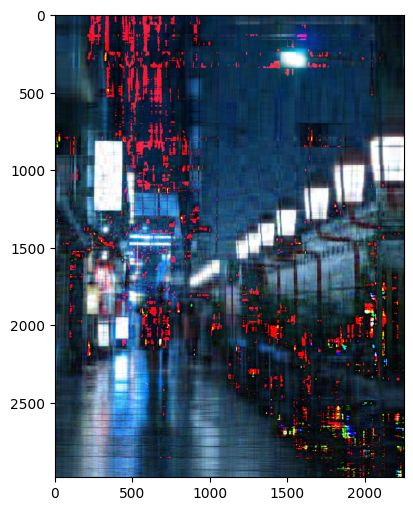

In [53]:
compressed = compress_by_rank(0.01)
plt.figure(figsize=(9,6))
plt.imshow(compressed)